# Employee Attrition Prediction (Classification)

# Objective:
## Predict whether an employee is likely to leave the company based on work-related and demographic features.


In [2]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the dataset 
df = pd.read_csv(r"C:\Users\kingzuzu\Downloads\HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Preprocess data

In [4]:
# checking data informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# checking shape
df.shape

(1470, 35)

In [6]:
# checking the statistical summary
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# checking the features 
print(df.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [8]:
# identify missing vlaue
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## showing some visualization for better understanding of the dataset

<Figure size 800x500 with 0 Axes>

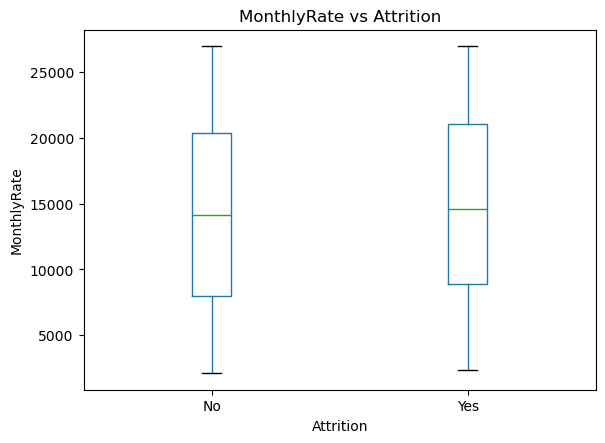

In [9]:
plt.figure(figsize=(8,5))
df.boxplot(column='MonthlyRate', by='Attrition', grid=False)
plt.title("MonthlyRate vs Attrition")
plt.suptitle("")
plt.ylabel("MonthlyRate")
plt.show();

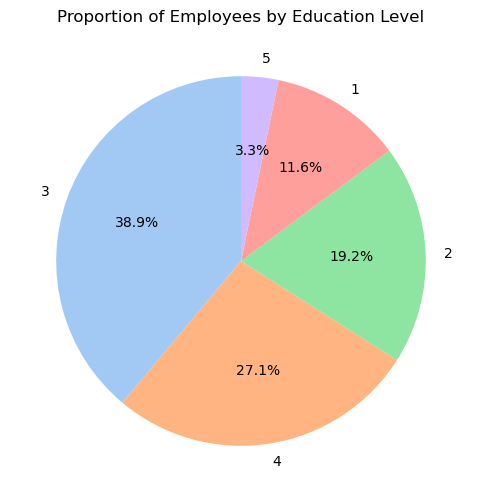

In [10]:
plt.figure(figsize=(6,6))
df['Education'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.title("Proportion of Employees by Education Level")
plt.ylabel("") 
plt.show()

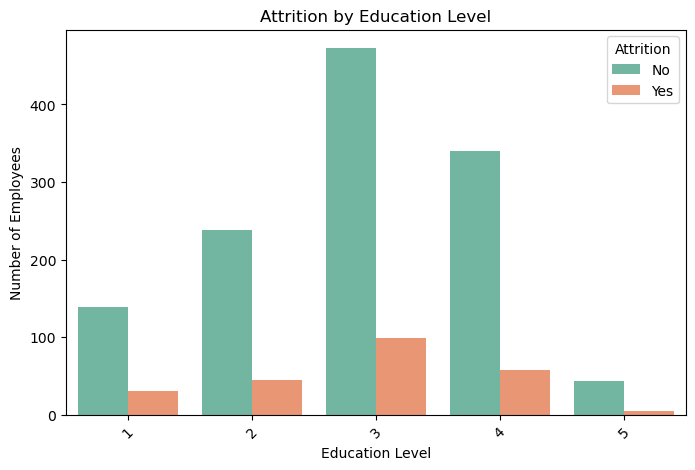

In [11]:
# Visualization: Education vs Attrition
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Education', hue='Attrition', palette="Set2")
plt.title("Attrition by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.legend(title="Attrition")
plt.show()

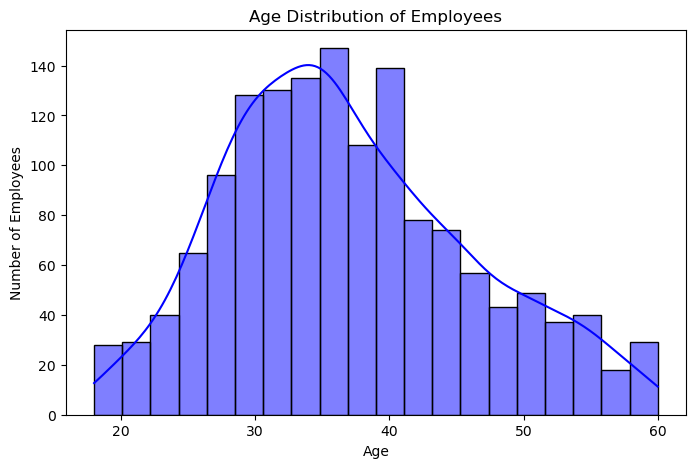

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color="blue", edgecolor="black")
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show();

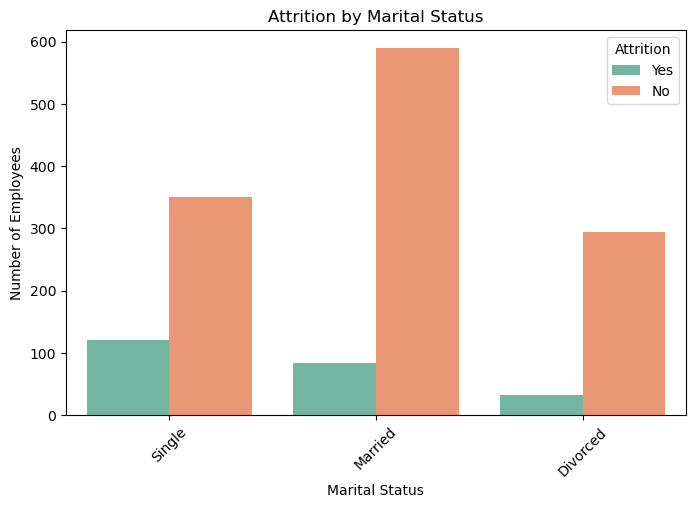

In [62]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette="Set2")
plt.title("Attrition by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.legend(title="Attrition")
plt.show();

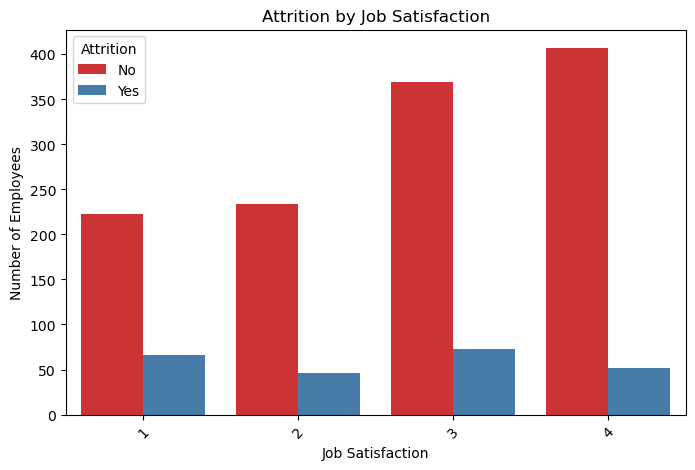

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette="Set1")
plt.title("Attrition by Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.legend(title="Attrition")
plt.show()

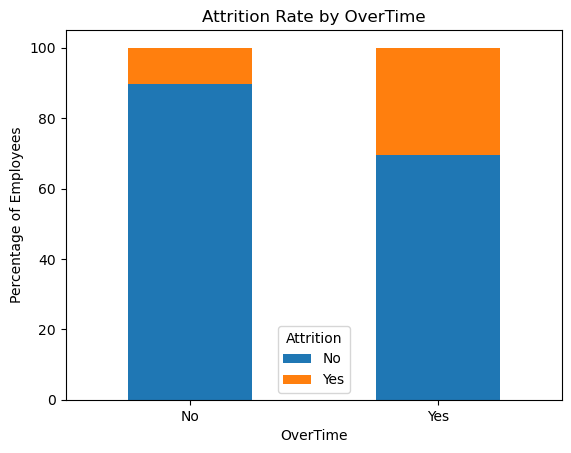

In [15]:
# Calculate attrition rate for OverTime vs No OverTime
attrition_rate = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack() * 100

# Plot as percentage stacked bar
attrition_rate.plot(kind='bar', stacked=True)
plt.title("Attrition Rate by OverTime")
plt.xlabel("OverTime")
plt.ylabel("Percentage of Employees")
plt.legend(title="Attrition")
plt.xticks(rotation=0)
plt.show()

In [16]:
# drop column
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)


In [17]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


# Encode categorical variables (e.g., department, gender)

In [18]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Apply label encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [19]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


# Handle outliers (e.g., extremely high salary or overtime)

In [20]:
# detect and cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1                   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[column] = df[column].apply(lambda x: 
                                   upper_bound if x > upper_bound 
                                   else (lower_bound if x < lower_bound else x))
    return df

df = cap_outliers(df, "DailyRate")
df = cap_outliers(df, "YearsAtCompany")

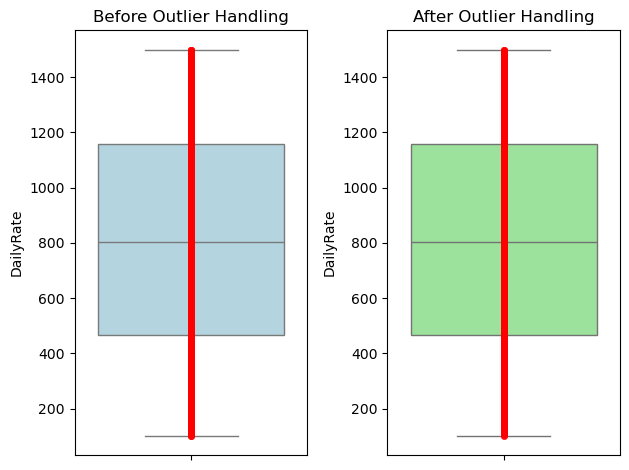

In [21]:
#  Before
plt.subplot(1, 2, 1)
sns.boxplot(y=df["DailyRate"], color="lightblue", showfliers=True)  
sns.stripplot(y=df["DailyRate"], color="red", alpha=0.9, jitter=False) 
plt.title("Before Outlier Handling")
plt.ylabel("DailyRate")

#  After 
plt.subplot(1, 2, 2)
sns.boxplot(y=df["DailyRate"], color="lightgreen", showfliers=True)
sns.stripplot(y=df["DailyRate"], color="red", alpha=0.6, jitter=False)
plt.title("After Outlier Handling")
plt.ylabel("DailyRate")

plt.tight_layout()
plt.show()

# 2. Apply classification algorithms

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix 
    # Function to evaluate classification model
def evaluate_classification(y_true, y_pred):
    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    # Print metrics
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print("\nConfusion Matrix:")
    print(cm)

### Using logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [24]:
# Split data
X = df.drop("Attrition", axis=1)
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Training, fitting and predicting the model
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Evaluate
evaluate_classification(y_test, y_pred)

Accuracy:  0.8673
Precision: 0.5000
Recall:    0.1026
F1-Score:  0.1702

Confusion Matrix:
[[251   4]
 [ 35   4]]


In [27]:
# building logistic regression with StandardScaler  

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

log_reg = make_pipeline(StandardScaler(), LogisticRegression()) 
log_reg.fit(X_train, y_train) 

y_pred1 = log_reg.predict(X_test)
evaluate_classification(y_test,y_pred1)

Accuracy:  0.9014
Precision: 0.7500
Recall:    0.3846
F1-Score:  0.5085

Confusion Matrix:
[[250   5]
 [ 24  15]]


In [28]:
#  using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [30]:
#  split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#  Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
#  Predict
y_pred = rf_model.predict(X_test)

# Evaluate
evaluate_classification(y_test, y_pred)

Accuracy:  0.8844
Precision: 1.0000
Recall:    0.1282
F1-Score:  0.2273

Confusion Matrix:
[[255   0]
 [ 34   5]]


In [33]:
# using XGBoost
from xgboost import XGBClassifier

In [34]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [35]:
#  split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
#  Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_model.fit(X_train, y_train)

C:\Users\kingzuzu\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [02:33:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [37]:
#  Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate
evaluate_classification(y_test, y_pred)

Accuracy:  0.8844
Precision: 0.6471
Recall:    0.2821
F1-Score:  0.3929

Confusion Matrix:
[[249   6]
 [ 28  11]]


In [38]:
# using GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [40]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Train Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=200,     
    learning_rate=0.1,    
    max_depth=3,          
    random_state=42
)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [42]:
#  Predictions
y_pred = gb_model.predict(X_test)

#  Evaluate 
evaluate_classification(y_test, y_pred)

Accuracy:  0.8878
Precision: 0.6500
Recall:    0.3333
F1-Score:  0.4407

Confusion Matrix:
[[248   7]
 [ 26  13]]


In [43]:
# using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [45]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#  Train Decision Tree
dt_model = DecisionTreeClassifier(
    criterion="gini",  
    max_depth=None,     
    random_state=42
)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
#  Predictions 
y_pred = dt_model.predict(X_test)

# Evaluate
evaluate_classification(y_test, y_pred)

Accuracy:  0.7789
Precision: 0.2174
Recall:    0.2564
F1-Score:  0.2353

Confusion Matrix:
[[219  36]
 [ 29  10]]


# Model Performance:

Gradient Boosting Classifier achieved the highest accuracy (0.8878), outperforming all other models.

XGBoost and Random Forest also performed strongly, showing robust predictive power.

Logistic Regression remained valuable for interpreting which features impact attrition the most.

# Interpretation and Insight of Results

OverTime – The strongest predictor. Employees who frequently work overtime are far more likely to leave.

Monthly Income & JobLevel – Low salary and lower job levels are strongly linked with attrition.

Age – Younger employees show a higher tendency to quit.

DistanceFromHome – Long commutes increase the chance of resignation.

MaritalStatus – Single employees tend to leave more than married or divorced ones.

JobRole – Certain roles (like Sales and some R&D positions) show higher turnover rates.

# Conclusion

Employee attrition is driven mainly by workload (OverTime), compensation (MonthlyIncome, JobLevel), and personal demographics (Age, MaritalStatus, DistanceFromHome).
HR should focus on work–life balance, competitive pay, and career development opportunities to improve retention.